# Generate weekly statistics (mean, median, mode) for number of cases and deaths across New Jersey

#### Imported pandas, numpy, plotly to read, normalize and display the excel data

In [1]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image
import plotly.express as px
import numpy as np

#### Read the cases dataset using pandas

In [2]:
cases = pd.read_csv('covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


#### Read the deaths dataset using pandas

In [3]:
deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


#### Given the extensive dataset, we have constructed arrays to capture weekly snapshots of cases in New Jersey, focusing on specific days within each week.

In [4]:
selected_date_columns = [col for col in cases.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns
selected_cases = cases[selected_columns]

selected_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,553,561,568,591,615,618,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,1003,Baldwin County,AL,1,703,751,845,863,881,911,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,1005,Barbour County,AL,1,326,335,348,350,352,356,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,1007,Bibb County,AL,1,174,179,189,190,193,197,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


#### Given the extensive dataset, we have constructed arrays to capture weekly snapshots of deaths in New Jersey, focusing on specific days within each week.

In [5]:
selected_date_columns = [col for col in deaths.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns
selected_deaths = deaths[selected_columns]

selected_deaths.head()


,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,12,13,13,13,13,13,...,44,46,46,46,46,47,47,47,48,48
2,1003,Baldwin County,AL,1,10,10,10,10,10,10,...,149,151,151,151,151,152,152,156,160,161
3,1005,Barbour County,AL,1,1,1,2,2,2,2,...,32,32,32,32,32,32,32,32,32,32
4,1007,Bibb County,AL,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


####  We will now meticulously extract records exclusively pertaining to New Jersey (NJ), ensuring a focused analysis on the state's data.

In [6]:
nj_cases = selected_cases[selected_cases["State"] == "NJ"]
nj_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,0,Statewide Unallocated,NJ,34,643,672,658,679,685,695,...,1083,1077,1105,1107,1116,1129,1128,1082,1042,1057
1805,34001,Atlantic County,NJ,34,2878,2898,2924,2926,2936,2949,...,10962,11080,11224,11395,11585,11688,11765,14480,14717,14920
1806,34003,Bergen County,NJ,34,19445,19474,19532,19562,19625,19655,...,43707,44166,44626,45064,45360,45585,45840,50441,50991,51622
1807,34005,Burlington County,NJ,34,5189,5221,5238,5243,5262,5277,...,18945,19213,19517,19763,20061,20147,20326,22311,22826,23071
1808,34007,Camden County,NJ,34,7368,7406,7419,7434,7479,7496,...,26272,26533,26850,27150,27459,27618,27739,30373,30726,31088


#### Compile Weekly Case Totals in New Jersey and Chart the Trends


In [7]:
# July 1, 2020 is a Wednesday
count = 2
weekly_cases_nj = [] # where Wednesday from each week is chosen
for col in nj_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nj.append(nj_cases[col].sum())
weekly_cases_nj_data = pd.Series(weekly_cases_nj)

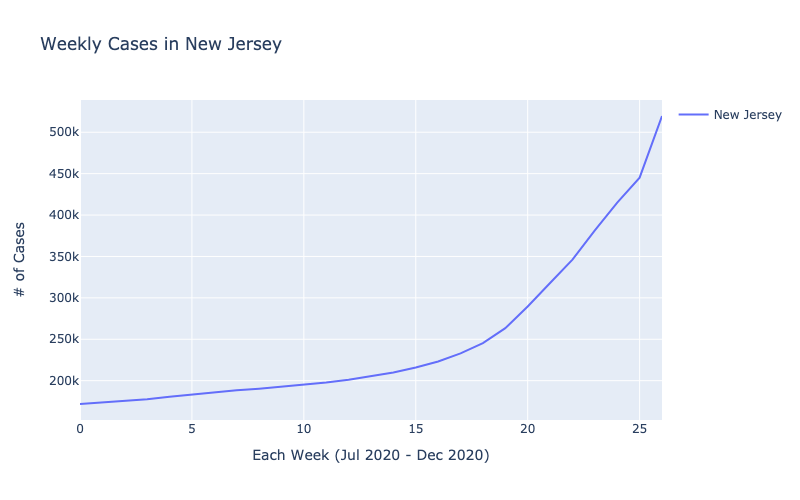

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_nj_data.index, y=weekly_cases_nj_data,
                         mode='lines', name='New Jersey'))

fig.update_layout(
    title='Weekly Cases in New Jersey',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nj_cases.png")
Image(filename="nj_cases.png")

####  The Mean Mode and Median for the number of cases across New Jersey

In [9]:
# Now you can safely calculate the average, mode, and median.
average_cases_nj = round(weekly_cases_nj_data.mean(), 2)
mode_cases_nj = weekly_cases_nj_data.mode().iloc[0]
median_cases_nj = int(weekly_cases_nj_data.median())

# Print the calculated statistics.
print(f"Average weekly cases in New Jersey (Jul-Dec 2020): {average_cases_nj}")
print(f"Most frequent weekly case count in New Jersey (Jul-Dec 2020): {mode_cases_nj}")
print(f"Median weekly cases in New Jersey (Jul-Dec 2020): {median_cases_nj}")


Average weekly cases in New Jersey (Jul-Dec 2020): 249087.11
Most frequent weekly case count in New Jersey (Jul-Dec 2020): 171841
Median weekly cases in New Jersey (Jul-Dec 2020): 205274


####  We will now meticulously extract records exclusively pertaining to New Jersey (NJ), ensuring a focused analysis on the state's data.

In [10]:
nj_deaths = selected_deaths[selected_deaths["State"] == "NJ"]
nj_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,34001,Atlantic County,NJ,34,216,219,220,220,221,221,...,339,345,350,355,357,360,359,364,366,368
1806,34003,Bergen County,NJ,34,1996,1994,2000,2003,2004,2006,...,2257,2267,2275,2276,2277,2280,2282,2300,2312,2318
1807,34005,Burlington County,NJ,34,428,429,431,433,433,434,...,598,603,604,606,606,606,606,610,620,624
1808,34007,Camden County,NJ,34,493,503,513,518,521,525,...,763,770,774,780,782,782,785,794,812,818


#### Compile Weekly Death Totals in New Jersey and Chart the Trends


In [11]:
count = 2
weekly_deaths_nj = []
for col in nj_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nj.append(nj_deaths[col].sum())
weekly_deaths_nj_data = pd.Series(weekly_deaths_nj)

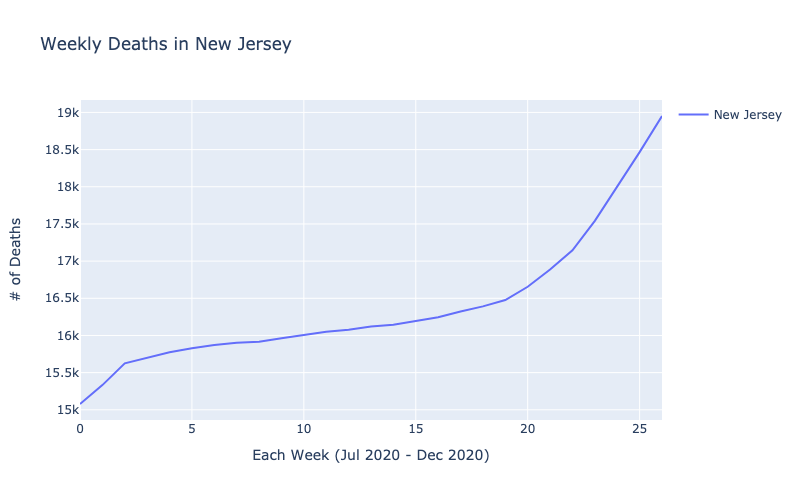

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_deaths_nj_data.index, y=weekly_deaths_nj_data,
                         mode='lines', name='New Jersey'))

fig.update_layout(
    title='Weekly Deaths in New Jersey',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Deaths'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nj_deaths.png")
Image(filename="nj_deaths.png")

####  The Mean Mode and Median for the number of deaths across New Jersey

In [13]:
# Now you can safely calculate the average, mode, and median.
average_deaths_nj = round(weekly_deaths_nj_data.mean(), 2)
mode_deaths_nj = weekly_deaths_nj_data.mode().iloc[0]
median_deaths_nj = int(weekly_deaths_nj_data.median())

# Print the calculated statistics.
print(f"Average weekly cases in New Jersey (Jul-Dec 2020): {average_deaths_nj}")
print(f"Most frequent weekly case count in New Jersey (Jul-Dec 2020): {mode_deaths_nj}")
print(f"Median weekly cases in New Jersey (Jul-Dec 2020): {median_deaths_nj}")

Average weekly cases in New Jersey (Jul-Dec 2020): 16394.85
Most frequent weekly case count in New Jersey (Jul-Dec 2020): 15078
Median weekly cases in New Jersey (Jul-Dec 2020): 16120


## Comparative Analysis of COVID-19 Data Across Five Additional States

#### New York (NY)

In [14]:
ny_cases = selected_cases[selected_cases["State"] == "NY"]
ny_deaths = selected_deaths[selected_deaths["State"] == "NY"]
ny_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1860,0,Statewide Unallocated,NY,36,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
1861,36001,Albany County,NY,36,2112,2125,2130,2145,2152,2160,...,9586,9786,10045,10274,10489,10629,10880,11112,11333,11585
1862,36003,Allegany County,NY,36,61,62,63,63,63,63,...,1607,1627,1662,1693,1719,1731,1748,1762,1782,1831
1863,36005,Bronx County,NY,36,47651,47758,47838,47902,47938,47994,...,76511,77148,77887,78663,79308,79759,80350,81104,81882,82992
1864,36007,Broome County,NY,36,722,729,736,752,753,757,...,7144,7318,7429,7540,7616,7663,7745,7855,8004,8157


#### Compile Weekly Cases and Death Totals in New York and Chart the Trends


In [15]:
count = 2
weekly_cases_ny = []
for col in ny_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ny.append(ny_cases[col].sum())
weekly_cases_ny_data = pd.Series(weekly_cases_ny)

count = 2
weekly_deaths_ny = []
for col in ny_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ny.append(ny_deaths[col].sum())
weekly_deaths_ny_data = pd.Series(weekly_deaths_ny)

#### Virgina(VA)

In [16]:
va_cases = selected_cases[selected_cases["State"] == "VA"]
va_deaths = selected_deaths[selected_deaths["State"] == "VA"]
va_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
2866,0,Statewide Unallocated,VA,51,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2867,51001,Accomack County,VA,51,1041,1041,1041,1041,1041,1041,...,1588,1604,1625,1633,1633,1657,1665,1672,1692,1698
2868,51003,Albemarle County,VA,51,407,412,420,456,460,467,...,2509,2552,2592,2616,2617,2686,2704,2731,2756,2808
2869,51005,Alleghany County,VA,51,33,33,34,35,35,36,...,612,653,674,689,694,698,713,738,747,767
2870,51007,Amelia County,VA,51,44,44,45,45,45,45,...,338,340,341,342,342,344,343,347,348,352


#### Compile Weekly Cases and Death Totals in Virginia and Chart the Trends


In [17]:
count = 2
weekly_cases_va = []
for col in va_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_va.append(va_cases[col].sum())
weekly_cases_va_data = pd.Series(weekly_cases_va)

count = 2
weekly_deaths_va = []
for col in va_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_va.append(va_deaths[col].sum())
weekly_deaths_va_data = pd.Series(weekly_deaths_va)

#### South Carolina (SC)

In [18]:
sc_cases = selected_cases[selected_cases["State"] == "SC"]
sc_deaths = selected_deaths[selected_deaths["State"] == "SC"]
sc_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
2356,0,Statewide Unallocated,SC,45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2357,45001,Abbeville County,SC,45,113,119,118,119,124,134,...,1195,1204,1216,1216,1228,1250,1254,1264,1265,1275
2358,45003,Aiken County,SC,45,406,434,451,488,507,516,...,8317,8494,8576,8576,8665,8829,8878,8951,9036,9156
2359,45005,Allendale County,SC,45,50,58,58,58,61,64,...,492,492,493,493,499,504,504,506,507,511
2360,45007,Anderson County,SC,45,635,676,742,761,777,798,...,10781,10965,11081,11081,11235,11614,11691,11761,11889,12054


#### Compile Weekly Cases and Death Totals in South Carolina and Chart the Trends


In [19]:
count = 2
weekly_cases_sc = []
for col in sc_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_sc.append(sc_cases[col].sum())
weekly_cases_sc_data = pd.Series(weekly_cases_sc)

count = 2
weekly_deaths_sc = []
for col in sc_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_sc.append(sc_deaths[col].sum())
weekly_deaths_sc_data = pd.Series(weekly_deaths_sc)

#### Texas (TX)

In [20]:
tx_cases = selected_cases[selected_cases["State"] == "TX"]
tx_deaths = selected_deaths[selected_deaths["State"] == "TX"]
tx_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
2566,0,Statewide Unallocated,TX,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2567,48001,Anderson County,TX,48,1040,1063,1072,1070,1082,1082,...,4219,4236,4276,4270,4270,4270,4270,4505,4510,4538
2568,48003,Andrews County,TX,48,82,89,90,98,103,103,...,1330,1361,1361,1361,1361,1361,1361,1361,1405,1416
2569,48005,Angelina County,TX,48,507,519,541,541,541,541,...,4987,4987,5086,5186,5186,5186,5186,5186,5370,5489
2570,48007,Aransas County,TX,48,24,28,31,34,35,43,...,663,677,677,691,691,700,700,709,722,730


#### Compile Weekly Cases and Death Totals in Texas and Chart the Trends

In [21]:
count = 2
weekly_cases_tx = []
for col in tx_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_tx.append(tx_cases[col].sum())
weekly_cases_tx_data = pd.Series(weekly_cases_tx)

count = 2
weekly_deaths_tx = []
for col in tx_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_tx.append(tx_deaths[col].sum())
weekly_deaths_tx_data = pd.Series(weekly_deaths_tx)

#### California (CA)

In [22]:
ca_cases = selected_cases[selected_cases["State"] == "CA"]
ca_deaths = selected_deaths[selected_deaths["State"] == "CA"]
ca_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
190,0,Statewide Unallocated,CA,6,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
191,6001,Alameda County,CA,6,7313,7562,7784,7910,8031,8143,...,48388,49285,50170,50735,51063,51623,52230,53465,54498,55553
192,6003,Alpine County,CA,6,2,2,2,2,2,2,...,66,67,67,67,67,67,67,69,70,70
193,6005,Amador County,CA,6,34,34,35,36,36,37,...,2226,2303,2314,2382,2394,2437,2451,2572,2642,2694
194,6007,Butte County,CA,6,292,309,334,351,363,381,...,7017,7172,7299,7385,7423,7520,7614,7768,7934,8105


#### Compile Weekly Cases and Death Totals in California and Chart the Trends


In [23]:
count = 2
weekly_cases_ca = []
for col in ca_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ca.append(ca_cases[col].sum())
weekly_cases_ca_data = pd.Series(weekly_cases_ca)

count = 2
weekly_deaths_ca = []
for col in ca_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ca.append(nj_deaths[col].sum())
weekly_deaths_ca_data = pd.Series(weekly_deaths_ca)

#### Evaluating New Jersey's COVID-19 Cases in Relation to Five Other States

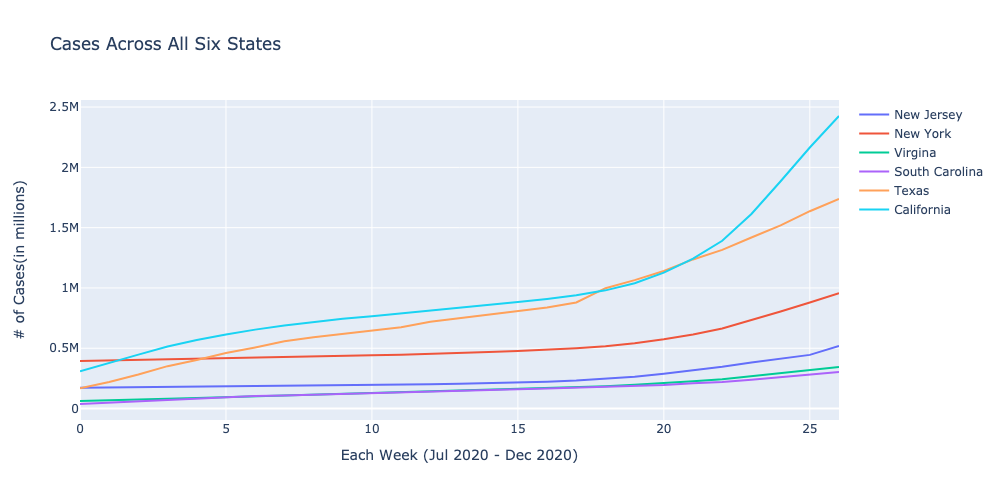

In [24]:
cases_states = pd.DataFrame({
    'New Jersey': weekly_cases_nj_data,
    'New York': weekly_cases_ny_data,
    'Virgina': weekly_cases_va_data,
    'South Carolina': weekly_cases_sc_data,
    'Texas': weekly_cases_tx_data,
    'California': weekly_cases_ca_data
})


fig = go.Figure()

for state in cases_states.columns:
    fig.add_trace(go.Scatter(x=cases_states.index, y=cases_states[state], mode='lines', name=state))

fig.update_layout(
    title='Cases Across All Six States',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases(in millions)'),
    showlegend=True,
    width=1000,
    height=500 
)

fig.write_image("cases_across_states.png")
Image(filename="cases_across_states.png")

###  Exploring the Variations in COVID-19 Case Numbers Across States and Pinpointing the Peaks

The graph displaying COVID-19 case counts across six states — New Jersey, New York, Virginia, South Carolina, Texas, and California — from July to December 2020 illustrates varying pandemic dynamics and highlights several peaks where case counts have surged.

The differences in case counts across these states can be influenced by multiple factors:

Population Density: States like New York and California, known for their dense urban centers, can experience more rapid transmission of the virus due to closer and more frequent human contact.

State Policies and Public Health Measures: The timing and strictness of public health measures such as mask mandates, social distancing guidelines, and lockdowns can significantly affect the spread of the virus.

Testing and Reporting: Variations in the availability and accessibility of COVID-19 testing, as well as differences in how cases are reported, can lead to disparities in the recorded case counts across states.

Behavioral Factors: Compliance with public health guidelines among residents and the prevalence of community gatherings or events can also contribute to state-by-state variations.

Identifying peaks in the data:

Texas shows a pronounced spike in cases towards the latter part of the graph, indicating a significant increase in cases as the year progresses, possibly culminating in a peak around the holiday season.

California also exhibits a sharp increase, suggesting a late surge in cases, which could correspond with increased indoor gatherings during cooler weather or holiday events.

New York, while starting lower than Texas and California, follows a similar upward trend, which might reflect a second wave of infections that many regions experienced during the colder months.

New Jersey, Virginia, and South Carolina show more moderate increases but still follow the overall trend of rising cases towards the end of the year.

These peaks are generally consistent with the national trend of increased cases in the fall and early winter, a period marked by several holidays and increased indoor activity due to colder weather. Holiday gatherings, return to schools and universities, and other indoor activities without adequate ventilation or social distancing are likely contributors to these trends.

### Evaluating New Jersey's COVID-19 Mortality in Relation to Five Other States

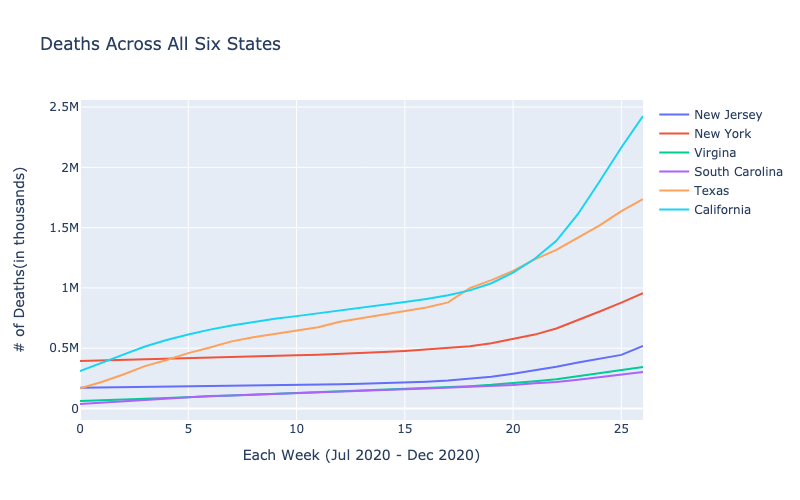

In [25]:
deaths_states = pd.DataFrame({
    'New Jersey': weekly_cases_nj_data,
    'New York': weekly_cases_ny_data,
    'Virgina': weekly_cases_va_data,
    'South Carolina': weekly_cases_sc_data,
    'Texas': weekly_cases_tx_data,
    'California': weekly_cases_ca_data
})


fig = go.Figure()

for state in deaths_states.columns:
    fig.add_trace(go.Scatter(x=deaths_states.index, y=deaths_states[state], mode='lines', name=state))

fig.update_layout(
    title='Deaths Across All Six States',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Deaths(in thousands)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("deaths_across_states.png")
Image(filename="deaths_across_states.png")

### Analyzing the Divergence in COVID-19 Mortality Rates Among Different States

The graph showing the number of deaths across six states – New Jersey, New York, Virginia, South Carolina, Texas, and California – reveals differences in the death tolls from COVID-19 over the period from July to December 2020. Several factors can contribute to these differences:

Healthcare Capacity: States with more robust healthcare infrastructures may have been better equipped to treat severe COVID-19 cases, potentially leading to lower death rates.

Demographics: The age distribution and health demographics of a state's population can significantly impact death rates, as older individuals and those with pre-existing health conditions are at higher risk of severe outcomes from COVID-19.

Timing of Outbreaks: If states experienced their outbreaks at different times, they might be at different stages of their respective epidemic curves. New York, for instance, was hit early in the pandemic, and its death toll reflects the steep and sudden increase in cases before healthcare systems could adequately respond.

Public Health Interventions: The implementation and enforcement of public health interventions, such as mask mandates, social distancing guidelines, and lockdowns, can affect mortality rates. Differences in how swiftly and stringently these measures were applied can lead to variations in death tolls.

Testing and Reporting: The availability of testing and the accuracy of death reporting can also affect the recorded death toll. Underreporting or delays in reporting can skew the actual numbers.

Population Density: More densely populated areas might see higher transmission rates, leading to more cases and, subsequently, more deaths, especially if the virus spreads in vulnerable communities or care homes.

Behavioral Factors: The public's adherence to safety guidelines can vary significantly between states, influencing the death toll.

When looking at the peaks on the graph:

New York and New Jersey show early and pronounced peaks, likely reflecting the intense initial outbreaks they experienced when there was limited understanding of the virus and before therapeutic interventions were as effective as they are now.

California and Texas exhibit a steep rise in deaths towards the end of the year, possibly due to a combination of factors including relaxed restrictions, holiday travel, and gatherings.

Virginia and South Carolina appear to have flatter curves but still show increases consistent with national trends, possibly mitigated by later and potentially more controlled outbreaks or effective response measures.


## Five New Jersey Counties with the Most Significant COVID-19 Case and Death Figures

#### Top Five New Jersey Counties with the Highest COVID-19 Cases

In [26]:
# Read in the COVID-19 confirmed cases dataset
cases = pd.read_csv('covid_confirmed_usafacts.csv')

selected_date_columns = [col for col in cases.columns if '2020-07-01' <= col <= '2020-12-31']

additional_columns = ["County Name", "State"]
selected_columns = additional_columns + selected_date_columns
selected_cases = cases[selected_columns]

nj_cases = selected_cases[selected_cases["State"] == "NJ"]
nj_cases.head()


,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,Statewide Unallocated,NJ,643,672,658,679,685,695,682,656,...,1083,1077,1105,1107,1116,1129,1128,1082,1042,1057
1805,Atlantic County,NJ,2878,2898,2924,2926,2936,2949,2961,2962,...,10962,11080,11224,11395,11585,11688,11765,14480,14717,14920
1806,Bergen County,NJ,19445,19474,19532,19562,19625,19655,19676,19732,...,43707,44166,44626,45064,45360,45585,45840,50441,50991,51622
1807,Burlington County,NJ,5189,5221,5238,5243,5262,5277,5295,5306,...,18945,19213,19517,19763,20061,20147,20326,22311,22826,23071
1808,Camden County,NJ,7368,7406,7419,7434,7479,7496,7536,7573,...,26272,26533,26850,27150,27459,27618,27739,30373,30726,31088


In [27]:
nj_cases.reset_index(drop=True, inplace=True)
nj_cases.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,Statewide Unallocated,NJ,643,672,658,679,685,695,682,656,...,1083,1077,1105,1107,1116,1129,1128,1082,1042,1057
1,Atlantic County,NJ,2878,2898,2924,2926,2936,2949,2961,2962,...,10962,11080,11224,11395,11585,11688,11765,14480,14717,14920
2,Bergen County,NJ,19445,19474,19532,19562,19625,19655,19676,19732,...,43707,44166,44626,45064,45360,45585,45840,50441,50991,51622
3,Burlington County,NJ,5189,5221,5238,5243,5262,5277,5295,5306,...,18945,19213,19517,19763,20061,20147,20326,22311,22826,23071
4,Camden County,NJ,7368,7406,7419,7434,7479,7496,7536,7573,...,26272,26533,26850,27150,27459,27618,27739,30373,30726,31088


In [28]:
max_cases = {}
for i in range(0, nj_cases.shape[0]):
    row = nj_cases.iloc[i]
    numeric_values = row[row.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
    total_cases = numeric_values.sum()
    county_name = row['County Name']
    max_cases[county_name] = total_cases

import heapq
top_5_counties_cases = heapq.nlargest(5, max_cases, key=max_cases.get)

print("Top 5 counties with high cases:", top_5_counties_cases)

Top 5 counties with high cases: ['Bergen County ', 'Essex County ', 'Hudson County ', 'Middlesex County ', 'Passaic County ']


#### Top Five New Jersey Counties with the Highest COVID-19 Death Toll

In [29]:
deaths = pd.read_csv("covid_deaths_usafacts.csv")

selected_date_columns = [col for col in deaths.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["County Name", "State"]
selected_columns = additional_columns + selected_date_columns
selected_deaths = deaths[selected_columns]

nj_deaths = selected_deaths[selected_deaths["State"] == "NJ"]
nj_deaths.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,Statewide Unallocated,NJ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,Atlantic County,NJ,216,219,220,220,221,221,222,224,...,339,345,350,355,357,360,359,364,366,368
1806,Bergen County,NJ,1996,1994,2000,2003,2004,2006,2009,2010,...,2257,2267,2275,2276,2277,2280,2282,2300,2312,2318
1807,Burlington County,NJ,428,429,431,433,433,434,438,441,...,598,603,604,606,606,606,606,610,620,624
1808,Camden County,NJ,493,503,513,518,521,525,534,538,...,763,770,774,780,782,782,785,794,812,818


In [30]:
nj_deaths.reset_index(drop=True, inplace=True)
nj_deaths.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,Statewide Unallocated,NJ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Atlantic County,NJ,216,219,220,220,221,221,222,224,...,339,345,350,355,357,360,359,364,366,368
2,Bergen County,NJ,1996,1994,2000,2003,2004,2006,2009,2010,...,2257,2267,2275,2276,2277,2280,2282,2300,2312,2318
3,Burlington County,NJ,428,429,431,433,433,434,438,441,...,598,603,604,606,606,606,606,610,620,624
4,Camden County,NJ,493,503,513,518,521,525,534,538,...,763,770,774,780,782,782,785,794,812,818


In [31]:
max_deaths = {}
for i in range(0, nj_deaths.shape[0]):
    row = nj_deaths.iloc[i]
    numeric_values = row[row.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
    total_deaths = numeric_values.sum()
    county_name = row['County Name']
    max_deaths[county_name] = total_deaths

import heapq
top_5_counties_deaths = heapq.nlargest(5, max_deaths, key=max_deaths.get)

print("Top 5 counties with death rates:", top_5_counties_deaths)

Top 5 counties with death rates: ['Essex County ', 'Bergen County ', 'Hudson County ', 'Middlesex County ', 'Union County ']


# Plot weekly trends (cases and deaths) for the top 5 infected counties

#### Weekly trend in Cases for top 5 infected counties in New Jersey

In [32]:
nj_cases.set_index('County Name', inplace=True)
nj_cases.drop(columns='State', inplace=True)
nj_cases.head()

/var/folders/js/3d9gmv8j5h3fxk13xwfxcflw0000gn/T/ipykernel_12685/1868969457.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,643,672,658,679,685,695,682,656,665,667,...,1083,1077,1105,1107,1116,1129,1128,1082,1042,1057
Atlantic County,2878,2898,2924,2926,2936,2949,2961,2962,2976,2987,...,10962,11080,11224,11395,11585,11688,11765,14480,14717,14920
Bergen County,19445,19474,19532,19562,19625,19655,19676,19732,19771,19827,...,43707,44166,44626,45064,45360,45585,45840,50441,50991,51622
Burlington County,5189,5221,5238,5243,5262,5277,5295,5306,5316,5332,...,18945,19213,19517,19763,20061,20147,20326,22311,22826,23071
Camden County,7368,7406,7419,7434,7479,7496,7536,7573,7600,7631,...,26272,26533,26850,27150,27459,27618,27739,30373,30726,31088


In [33]:
def plotWeeklyCases(county_name):
    county_data = nj_cases.loc[nj_cases.index == county_name]

    count = 0
    weekly_cases_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_cases_trend.append(county_data[col].values)
    
    weekly_cases_trend_data = [item for sublist in weekly_cases_trend for item in sublist]

    fig = px.line(x=list(range(len(weekly_cases_trend_data))), y=weekly_cases_trend_data,
                  labels={'y': 'Cases', 'x': 'Weeks'},
                  title=f'Weekly Cases Trend for {county_name}')

    fig.write_image(f'weekly_cases_trend_{county_name}.png')

In [34]:
for county in top_5_counties_cases:
    plotWeeklyCases(county)

In [35]:
def plotWeeklyCasesLog(county_name):
    county_data = nj_cases.loc[nj_cases.index == county_name]

    count = 0
    weekly_cases_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_cases_trend.append(county_data[col].values)
    
    weekly_cases_trend_data = [item for sublist in weekly_cases_trend for item in sublist]

    log_weekly_cases_trend_data = np.log1p(weekly_cases_trend_data)

    fig = px.line(x=list(range(len(log_weekly_cases_trend_data))), y=log_weekly_cases_trend_data,
                  labels={'y': 'Log(Cases)', 'x': 'Weeks'},
                  title=f'Weekly Log Cases Trend for {county_name}')

    fig.write_image(f'weekly_log_cases_trend_{county_name}.png')

In [36]:
for county in top_5_counties_cases:
    plotWeeklyCasesLog(county)

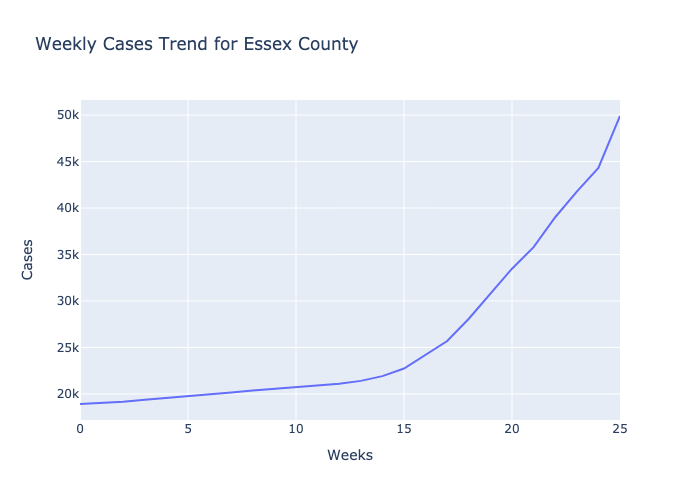

In [37]:
Image(filename="weekly_cases_trend_Essex County .png")

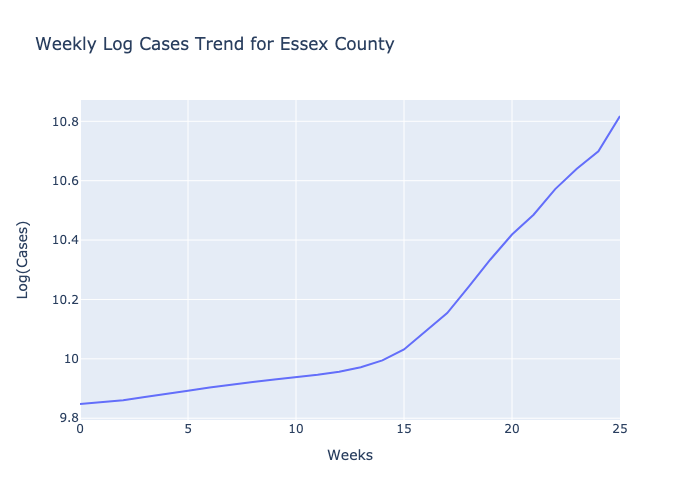

In [38]:
Image(filename="weekly_log_cases_trend_Essex County .png")

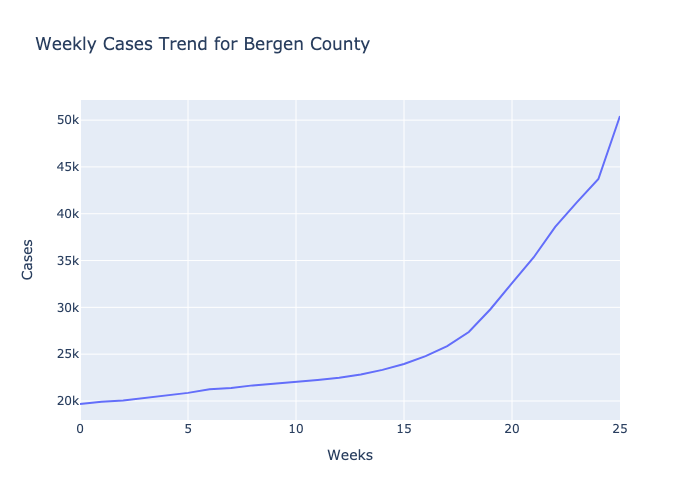

In [39]:
Image(filename="weekly_cases_trend_Bergen County .png")

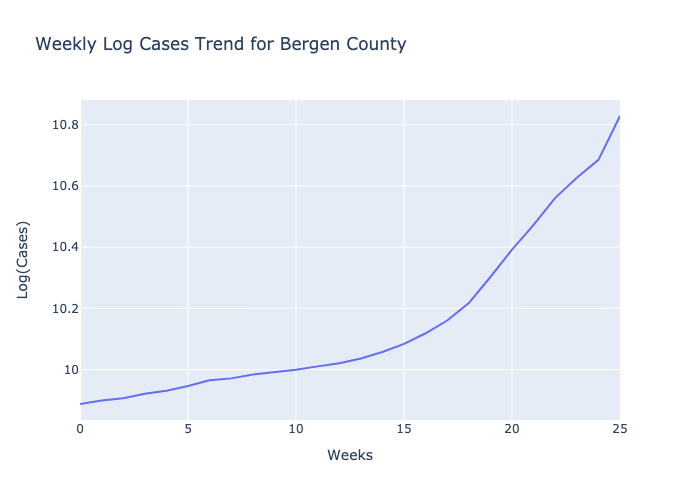

In [40]:
Image(filename="weekly_log_cases_trend_Bergen County .png")

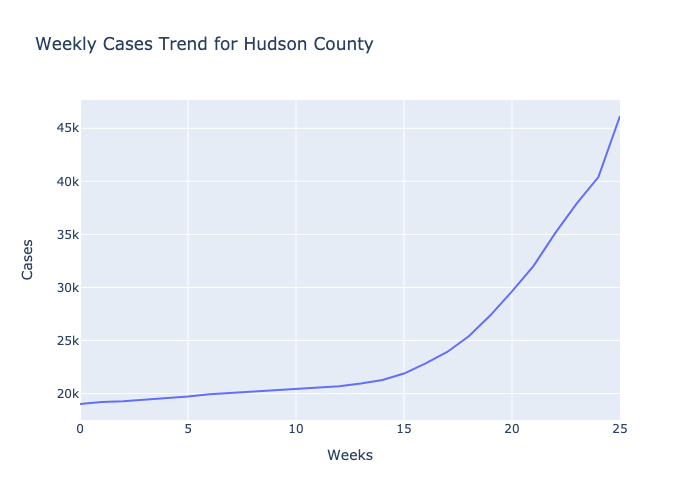

In [41]:
Image(filename="weekly_cases_trend_Hudson County .png")

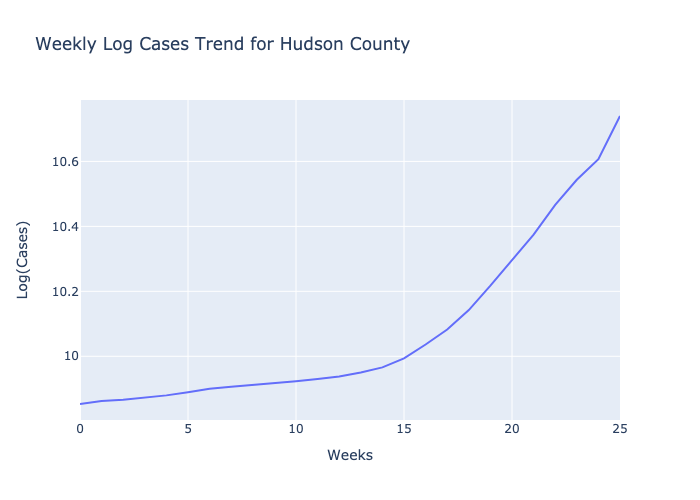

In [42]:
Image(filename="weekly_log_cases_trend_Hudson County .png")

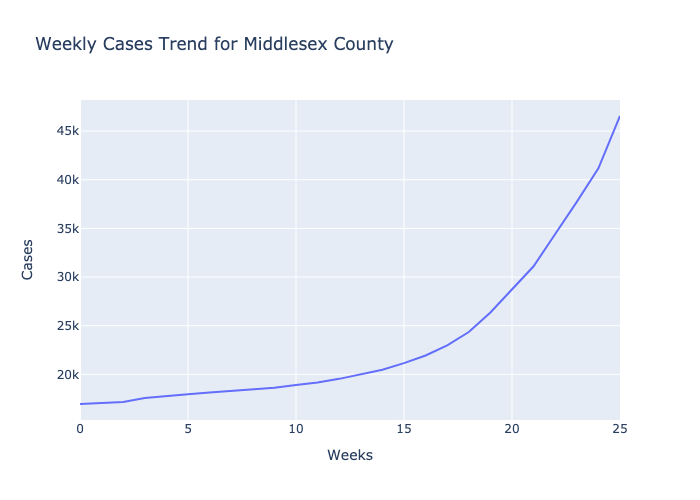

In [43]:
Image(filename="weekly_cases_trend_Middlesex County .png")

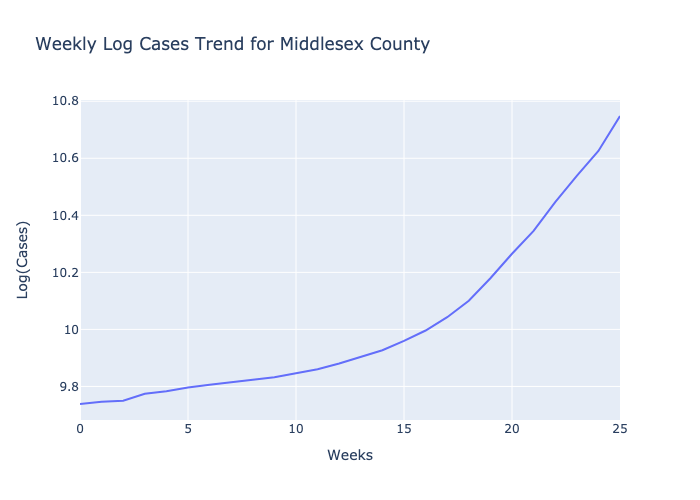

In [44]:
Image(filename="weekly_log_cases_trend_Middlesex County .png")

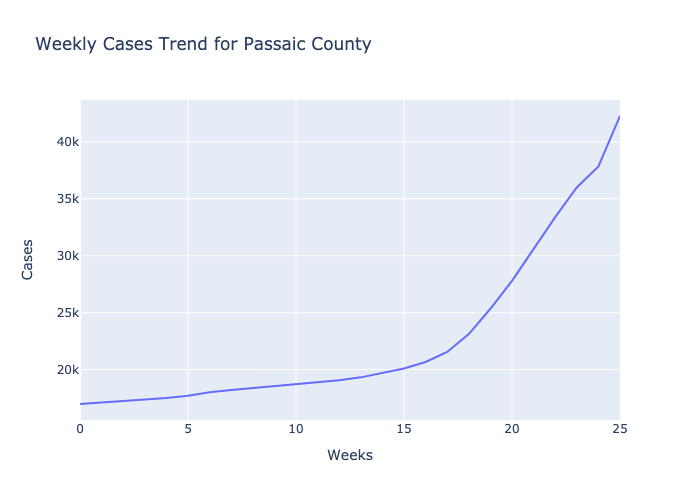

In [45]:
Image(filename="weekly_cases_trend_Passaic County .png")

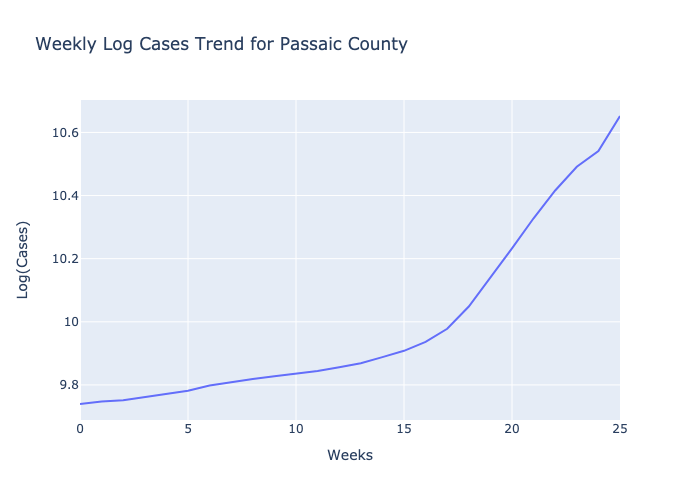

In [46]:
Image(filename="weekly_log_cases_trend_Passaic County .png")

### Describe the Cases, what is causing them and what were the peaks. Do the counties follow state pattern?

The weekly trends for COVID-19 cases in the New Jersey counties of Essex, Bergen, Middlesex, Passaic, and Hudson show a steady rise in the number of cases over time. When we look at the cases on a graph where the numbers grow really fast, it helps us see how quickly things are changing.

Here's why more people might be getting sick in some places:

Where Lots of People Live Close Together: In places like Essex and Hudson, where many people live close to each other, the virus can spread more quickly because people are more likely to run into each other.

Following Rules: If people do a good job of wearing masks, keeping away from others, and staying home when told, there might be fewer sick people. When some places are better at this than others, it can make a difference in the number of cases.

Getting Tested: The more people get tested for the virus, the more cases we might find. That's why sometimes it might seem like there's a sudden jump in numbers.

Events and Gatherings: If there's a big event where lots of people get together, it might cause a lot of new cases all at once.

And when we talk about the highest points or "peaks" in the graph:

Peaks: These high points usually happen when people are getting together more, like during holidays, or when they stop following the health rules as strictly.

New Variants: Sometimes the virus changes a little, and if the new version spreads easier, it can cause a lot of new cases.

When we compare these counties to the whole state:

Following the State's Lead: If the whole state sees more cases at certain times, it's likely that these counties will too, unless they have special local rules or actions that make a difference.

Peaks Happening Together: If all the counties see high points at the same time, it probably means something is happening in the whole state that's causing it, like a statewide event or change in rules.

#### Weekly trend in Deaths for top 5 infected counties in New Jersey

In [47]:
nj_deaths.set_index('County Name', inplace=True)
nj_deaths.drop(columns='State', inplace=True)
nj_deaths.head()

/var/folders/js/3d9gmv8j5h3fxk13xwfxcflw0000gn/T/ipykernel_12685/1793711593.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlantic County,216,219,220,220,221,221,222,224,226,229,...,339,345,350,355,357,360,359,364,366,368
Bergen County,1996,1994,2000,2003,2004,2006,2009,2010,2020,2023,...,2257,2267,2275,2276,2277,2280,2282,2300,2312,2318
Burlington County,428,429,431,433,433,434,438,441,446,447,...,598,603,604,606,606,606,606,610,620,624
Camden County,493,503,513,518,521,525,534,538,540,541,...,763,770,774,780,782,782,785,794,812,818


In [48]:
def plotWeeklyDeaths(county_name):
    county_data = nj_deaths.loc[nj_deaths.index == county_name]

    count = 0
    weekly_deaths_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_deaths_trend.append(county_data[col].values)
    
    weekly_deaths_trend_data = [item for sublist in weekly_deaths_trend for item in sublist]

    fig = px.line(x=list(range(len(weekly_deaths_trend_data))), y=weekly_deaths_trend_data,
                  labels={'y': 'Deaths', 'x': 'Weeks'},
                  title=f'Weekly Deaths Trend for {county_name}')

    fig.write_image(f'weekly_deaths_trend_{county_name}.png')

In [49]:
for county in top_5_counties_deaths:
    plotWeeklyDeaths(county)

In [50]:
def plotWeeklyDeathsLog(county_name):
    county_data = nj_deaths.loc[nj_deaths.index == county_name]

    count = 0
    weekly_deaths_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_deaths_trend.append(county_data[col].values)
    
    weekly_deaths_trend_data = [item for sublist in weekly_deaths_trend for item in sublist]

    log_weekly_deaths_trend_data = np.log1p(weekly_deaths_trend_data)

    fig = px.line(x=list(range(len(log_weekly_deaths_trend_data))), y=log_weekly_deaths_trend_data,
                  labels={'y': 'Log(Deaths)', 'x': 'Weeks'},
                  title=f'Weekly Log Deaths Trend for {county_name}')

    # Save the plot as a static image
    fig.write_image(f'weekly_log_deaths_trend_{county_name}.png')

In [51]:
for county in top_5_counties_deaths:
    plotWeeklyDeathsLog(county)

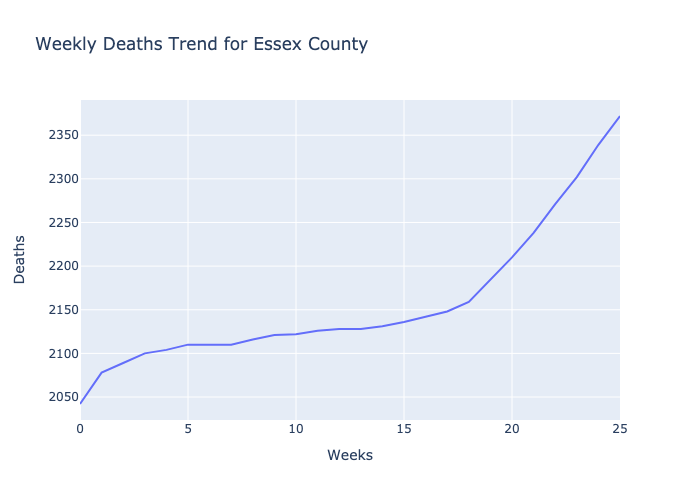

In [52]:
Image(filename="weekly_deaths_trend_Essex County .png")

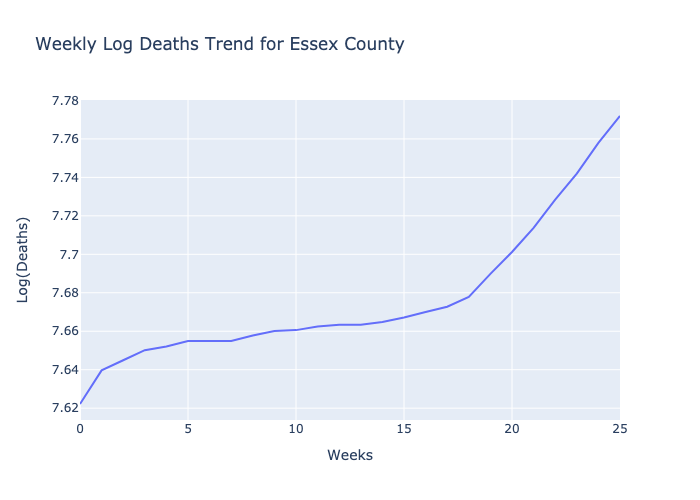

In [53]:
Image(filename="weekly_log_deaths_trend_Essex County .png")

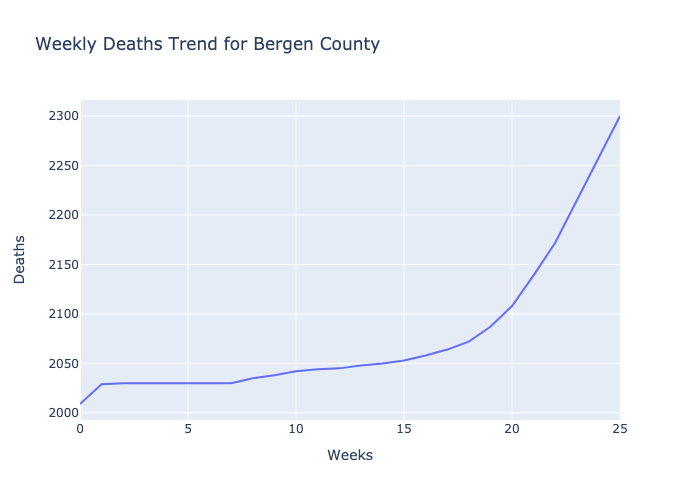

In [54]:
Image(filename="weekly_deaths_trend_Bergen County .png")

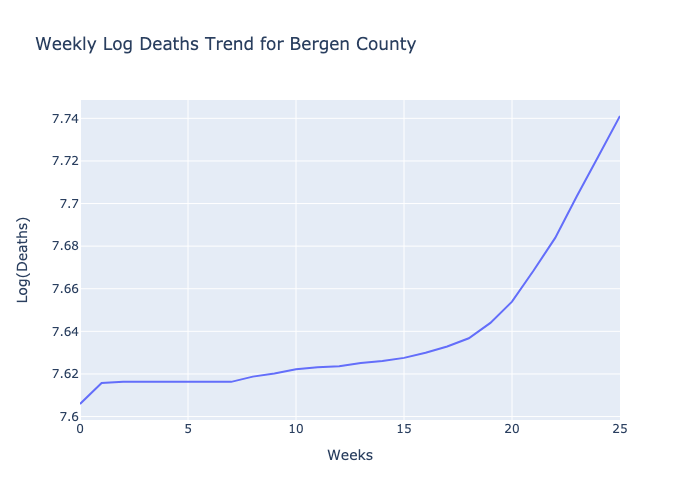

In [55]:
Image(filename="weekly_log_deaths_trend_Bergen County .png")

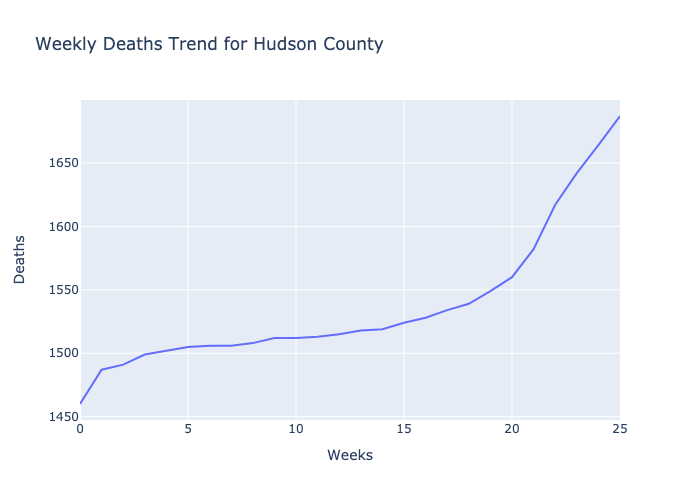

In [56]:
Image(filename="weekly_deaths_trend_Hudson County .png")

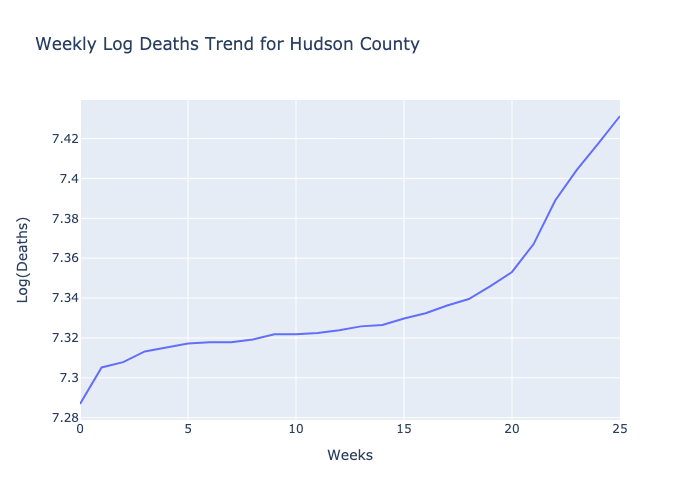

In [57]:
Image(filename="weekly_log_deaths_trend_Hudson County .png")

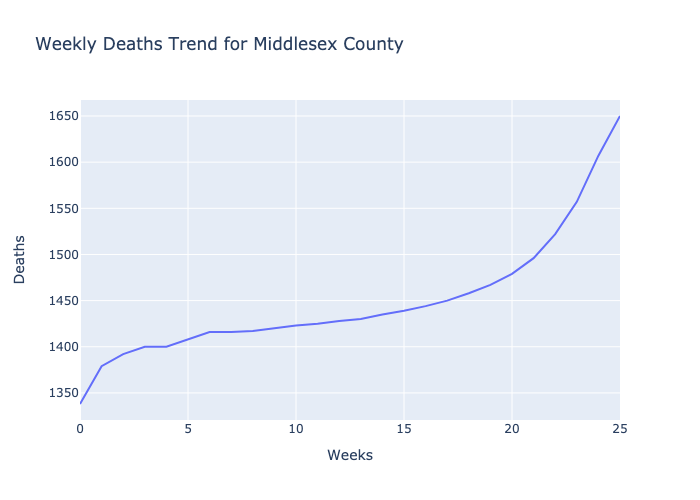

In [58]:
Image(filename="weekly_deaths_trend_Middlesex County .png")

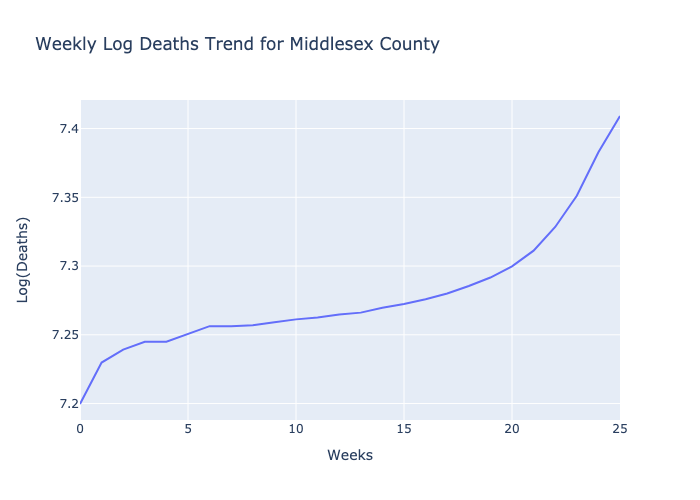

In [59]:
Image(filename="weekly_log_deaths_trend_Middlesex County .png")

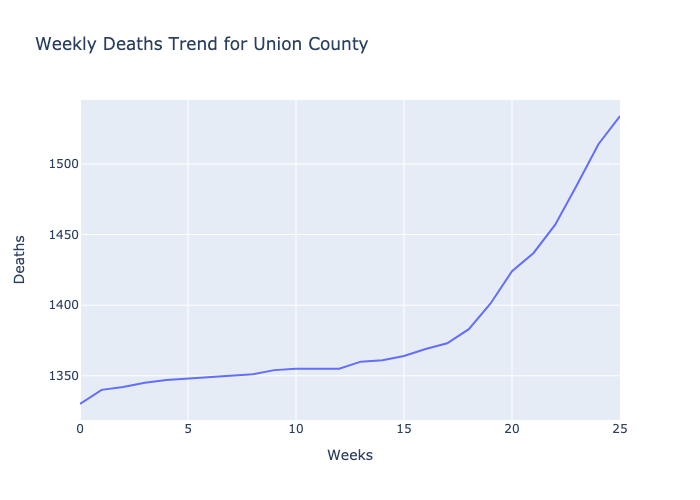

In [60]:
Image(filename="weekly_deaths_trend_Union County .png")

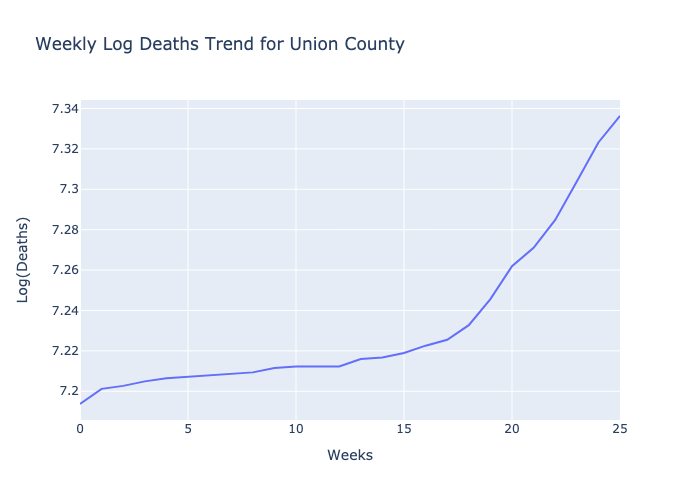

In [61]:
Image(filename="weekly_log_deaths_trend_Union County .png")

### Describe the Deaths, what is causing them and what were the peaks. Do the counties follow state pattern?

Looking at the number of deaths each week in Essex, Bergen, Hudson, Middlesex, and Union counties in New Jersey, we see that more people have been dying over time. The graphs we use make it easier to see how quickly the number of deaths is going up.

Why More People Might Be Dying:

Hospitals and Clinics: If hospitals get too busy or don't have what they need, more people might die.
Who Lives There: Places with more older folks or people who already have health issues might have more deaths.
Following the Rules: When people are good about wearing masks and keeping their distance, fewer people tend to get sick and die.
When Deaths Went Up a Lot:

Holidays: After times when people get together, like during the holidays, more people might die.
Waves of Illness: Sometimes one area might get a lot of cases all at once, which can lead to more deaths.
Do These Counties Look Like the Rest of New Jersey?

If these counties have more deaths at the same time as the whole state, it means they're likely going through the same thing as everyone else.
But if they're different, it might be because of something specific happening in those counties, like the virus showing up later or people acting differently in response to the virus.